In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
from datetime import date, datetime


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_US = df[(df['job_title']=='Data Analyst') &(df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [10]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending = False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
golang,1,145000.0
elasticsearch,3,128500.0
redis,1,128500.0
dynamodb,1,115000.0
jupyter,5,115000.0
mongodb,14,115000.0
bitbucket,1,111175.0
ssis,23,110000.0
gcp,12,106250.0


In [21]:
df_DA_topskills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending= False)
df_DA_topskills = df_DA_topskills.head(10)
df_DA_topskills =  df_DA_topskills.sort_values(by= 'median', ascending = False)

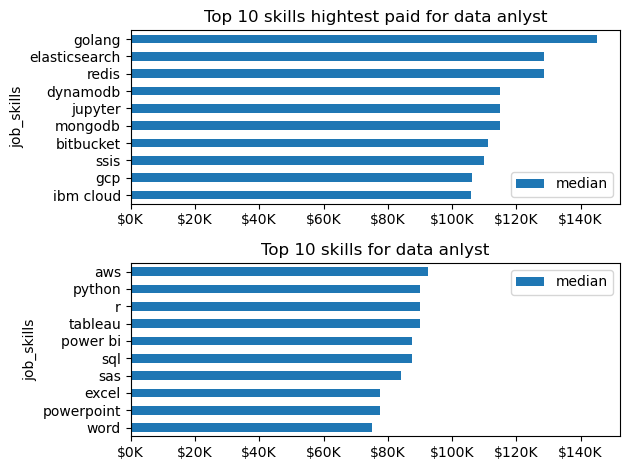

In [22]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind = 'barh', y='median', ax=ax[0])
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


df_DA_topskills[::-1].plot(kind= 'barh', y='median', ax=ax[1])
#ax[1].invert_yaxis()
#ax= ax.gca()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title('Top 10 skills hightest paid for data anlyst')
ax[1].set_title('Top 10 skills for data anlyst')

plt.tight_layout()
#plt.xlim(0, 200000)

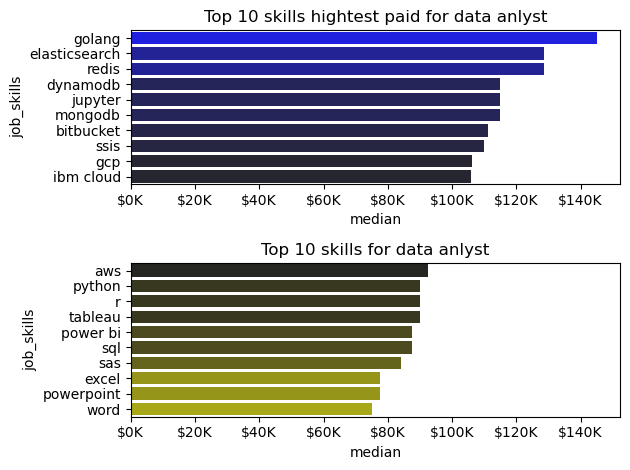

In [23]:
fig, ax = plt.subplots(2,1)

#df_DA_US_top.plot(kind = 'barh', y='median', ax=ax[0])
sns.barplot(data = df_DA_top_pay, x='median', y= df_DA_top_pay.index, ax = ax[0], hue='median', palette='dark:b')
#ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


#df_DA_US_topskills[::-1].plot(kind= 'barh', y='median', ax=ax[1])
sns.barplot(data = df_DA_topskills, x='median', y= df_DA_topskills.index, ax = ax[1], hue='median', palette='dark:y_r')
#ax[1].invert_yaxis()
#ax= ax.gca()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title('Top 10 skills hightest paid for data anlyst')
ax[1].set_title('Top 10 skills for data anlyst')
ax[1].legend().remove()

plt.tight_layout()
#plt.xlim(0, 200000)